# Courbe ROC

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
points, labels = make_classification(
    n_samples = 200, # nombre de points
    n_features = 2, # points dans le plan
    n_redundant = 0,
    n_repeated = 0,
    n_clusters_per_class = 1,
    n_classes = 2,
    flip_y = 0.25, # 25% des points auront un label au hasard
    random_state = 173
)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    points,
    labels,
    test_size=0.3,
    random_state=1
)

In [7]:
X_train.shape

(140, 2)

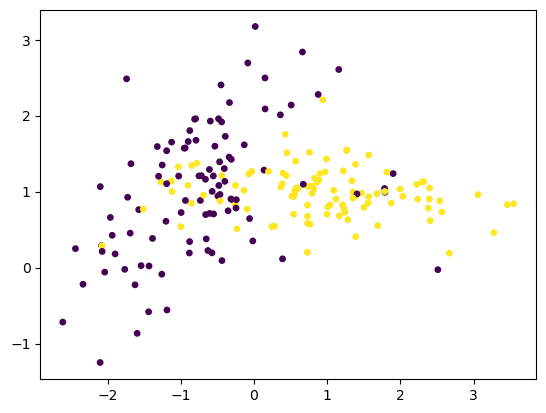

In [13]:
plt.scatter(points[:, 0], points[:, 1], s=15, c=labels)
plt.show()

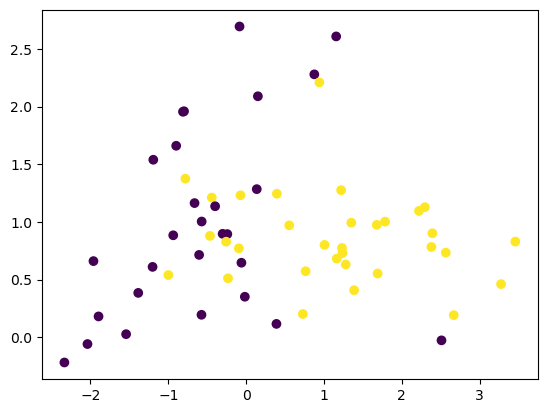

In [14]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
reg_clf = LogisticRegression(penalty='none')

In [22]:
reg_clf.fit(X_train, y_train)
probas = reg_clf.predict_proba(X_test)
print(probas.shape)
print(probas[:10, :])

(60, 2)
[[0.36588187 0.63411813]
 [0.05938484 0.94061516]
 [0.67752498 0.32247502]
 [0.77942491 0.22057509]
 [0.13911096 0.86088904]
 [0.63085364 0.36914636]
 [0.91108823 0.08891177]
 [0.47178331 0.52821669]
 [0.01911404 0.98088596]
 [0.74177156 0.25822844]]


In [24]:
# Probabilités pour les points d'appartenir à la classe 1 -> classification binaire
probas[:, 1] >= 0.5

array([ True,  True, False, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False,  True])

In [25]:
np.sum(probas[:, 1] >= 0.1) 

56

In [26]:
np.sum(probas[:, 1] >= 0.5)

33

In [27]:
np.sum(probas[:, 1] >= 0.7)

24

On voit donc l'évolution du nombre de cas positifs en fonction du seuil d'acceptation. Bien évidemment les valeurs de FP et FN évoluent aussi. La courbe ROC consiste à calculer l'anti-spécificité et la sensibilité pour chaque valeur de seuil.

In [28]:
from sklearn.metrics import classification_report

In [30]:
pred04 = probas[:, 1] >= 0.4
print(classification_report(y_true=y_test, y_pred=pred04))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.80        32

    accuracy                           0.77        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



In [31]:
pred09 = probas[:, 1] >= 0.9

In [33]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=pred04))
print(confusion_matrix(y_true=y_test, y_pred=pred09))

[[18 10]
 [ 4 28]]
[[27  1]
 [16 16]]


In [35]:
cf09 = confusion_matrix(y_true=y_test, y_pred=pred09)
sensi09 = cf09[1,1]/np.sum(cf09[1,:]) # VP/(FN + VP)
print(sensi09)

0.5


In [38]:
cf04 = confusion_matrix(y_true=y_test, y_pred=pred04)
sensi04 = cf04[1,1]/np.sum(cf04[1,:]) # VP/(FN + VP)
print(sensi04) # On remarque qu'on a bcp plus de cas positifs, car on a baissé le seuil d'acceptation

0.875


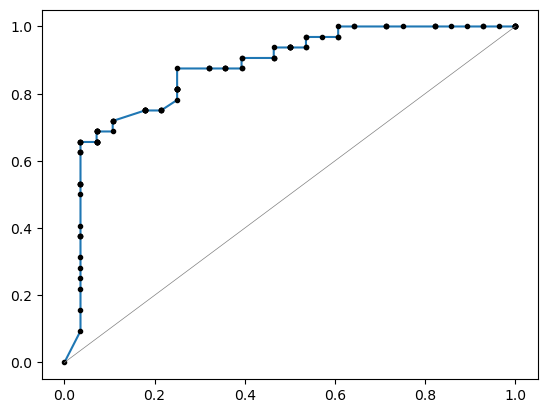

In [47]:
# Réalisation pour plusieurs seuils 
seuils = np.linspace(0, 1, 111)
x, y = [], [] # coordonnées pour la visualisation
for seuil in seuils:
    cf = confusion_matrix(y_true=y_test, y_pred=probas[:, 1] >= seuil)
    sensi = cf[1, 1]/np.sum(cf[1, :])
    spe = cf[0, 0]/np.sum(cf[0, :])
    antispe = 1 - spe
    x.append(antispe)
    y.append(sensi)
plt.plot(x, y)
# marquer les points pour chaque seuil
plt.plot(x, y, '.', c='black')
x = np.linspace(0, 1, 200)
y = x
plt.plot(x, y, linewidth = 0.5, color = 'gray')
plt.show()

### Exercice TP
Reproduire une même expérience (courbe ROC) pour deux nuages partiellement mélangés (non identiques à celui qu'on vient de faire en exemple) et l'estimateur complètement aléatoire ALEA. Penser à la reproductibilité. En particulier la méthode `__init__` de l'estimateur ALEA doit fixer un random_state à l'aide `np.random.seed()`, à une valeur de notre choix, i.e une valeur donnée en argument ou à défaut une valeur par défaut. L'estimateur doit prendre une forme orientée objet (méthodes init, fit, predict). Les méthodes fit et predict doivent fonctionner comme pour n'importe quel autre estimateur `sklearn` (ici LogisticRegression), i.e accepter tout un tableau numpy par exemple.

Il n'est pas nécessaire de refaire toutes les cellules, mais seulement ce qui est nécessaire pour les illustrations du dataset et de la courbe ROC.
Visualiser quelques courbes ROC pour quelques valeurs de random seed de notre choix.